<a href="https://colab.research.google.com/github/HyunMooKim/python-Data/blob/main/finance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read me

<h2>Content:</h2>

1. Implement and visualize the portfolio theory and Bollinger Bands.
2. Implement and compare various investment techniques such as trend-following, reversal trading, and three-screen trading.
3. Use the backtrader library to record trades and evaluate profitability.
4. Apply deep learning to predict stock prices.

<h2>How to run:</h2>
Run the code in the order provided, from top to bottom.
In the "Prepare for Comparing & Input Control" section, you can specify the stocks and time periods for the trend-following, reversal trading, and three-screen trading methods.

<h2>Content:</h2>
1.포트폴리오 이론과 bollinger band를 구현하고 시각화한다<br>.
2.추세 주총 매매, 반전 매매, 3중창 매매 등 다양한 투자 기법을 구현하고 비교해본다.<br>
3.backtrader library를 이용해 실제 매매처럼 기록을 남겨보고 수익률을 확인해본다.<br>
4.딥러닝을 이용해 주가 예측을 해본다.

<h2>How to run:</h2>
위에서 밑으로 순서대로 run한다.
prepare for comparing & input control 부분에서 trend following, reversal, 3-screen 매매 방법에 사용될 종목과 기간을 정할 수 있다.

# portfolio theory (Monte Carlo)




In [ ]:
!pip install finance-datareader

In [ ]:
#주식 데이터 가져오기
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#stocks
stocks=['AAPL','MSFT','GOOGL','AMZN']
start = '2020-01-01'
end = '2023-06-23'

df = pd. DataFrame()
#종가만 가져오기
for s in stocks:
  df[s] = fdr.DataReader(s, start, end)['Close']

daily_ret = df.pct_change() #각 주식 일간 변화율(수익률)
annual_ret = daily_ret.mean() * 252 #각 주식 연간 변화율
daily_cov = daily_ret.cov() #일간 리스크 => 각 주식 일간 변동률의 공분산
annual_cov = daily_cov * 252 #연간 리스크
df

,AAPL,MSFT,GOOGL,AMZN
Date,,,,
2020-01-02,75.087502,160.619995,68.433998,94.900497
2020-01-03,74.357498,158.619995,68.075996,93.748497
2020-01-06,74.949997,159.029999,69.890503,95.143997
2020-01-07,74.597504,157.580002,69.755501,95.343002
2020-01-08,75.797501,160.089996,70.251999,94.598503
...,...,...,...,...
2023-06-15,186.009995,348.100006,125.089996,127.110001
2023-06-16,184.919998,342.329987,123.529999,125.489998
2023-06-20,185.009995,338.049988,123.099998,125.779999


        Returns      Risk    Sharpe      AAPL      MSFT     GOOGL      AMZN
0      0.183111  0.328658  0.557147  0.396939  0.019448  0.540926  0.042687
1      0.134421  0.326755  0.411381  0.129286  0.275499  0.250410  0.344805
2      0.177859  0.326788  0.544263  0.257292  0.425473  0.177227  0.140009
3      0.140884  0.324253  0.434488  0.106810  0.208264  0.452340  0.232587
4      0.181193  0.337718  0.536521  0.018952  0.823356  0.099759  0.057933
...         ...       ...       ...       ...       ...       ...       ...
19995  0.176626  0.336369  0.525095  0.499816  0.199705  0.014738  0.285741
19996  0.138624  0.325173  0.426308  0.037543  0.324531  0.399240  0.238686
19997  0.158392  0.324648  0.487888  0.238707  0.278534  0.249463  0.233297
19998  0.192858  0.328708  0.586716  0.363001  0.370784  0.185389  0.080826
19999  0.157420  0.326300  0.482438  0.360419  0.036422  0.352494  0.250665

[20000 rows x 7 columns]
most lucrative portfolio:
Returns    0.241987
Risk       0.361

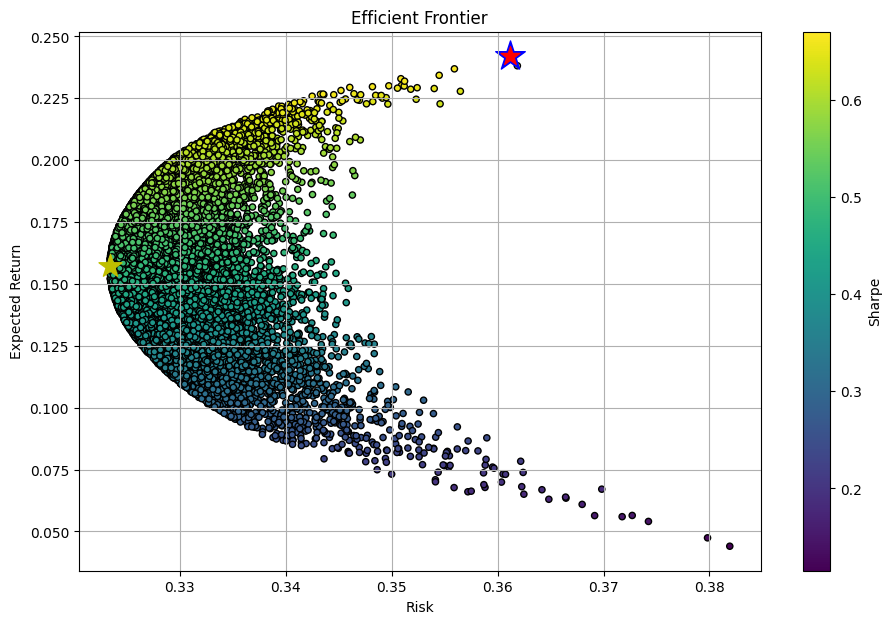

In [ ]:
#몬테카를로 시뮬레이션
#다양한 가중치를 이용

#portfolio 의 y축 - return, x축 - risk와 각 좌표의 가중치를 알고자 한다.
port_ret = []
port_risk = []
port_weight = []
# 샤프 지수 = (포트폴리오 예상 수익률-무위험률) / 표준편차
# 무위험률을 0으로 가정하고, (예상 수익률 / 표준편차) 로 리스트 당 수익률이 가장 높은 효율적인 point를 알고자 한다.
sharpe_ratio = []

for _ in range(20000):
  weights = np.random.random(len(stocks)) #stocks 길이만큼 무작위 가중치 생성
  weights /= np.sum(weights) #가중치 합이 1이 되도록 조정
  #page 259
  returns = np.dot(weights, annual_ret) #행 * 열 == (, 4) x (4,) => 하나의 값
  #risk - https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=schatz37&logNo=221360224437
  risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

  port_ret.append(returns)
  port_risk.append(risk)
  port_weight.append(weights)
  sharpe_ratio.append(returns/risk)

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe':sharpe_ratio}
#i는 index 0,1,2...... s는 주식이름
for i,s in enumerate(stocks):
  #각 주식에 대해 가중치를 기록
  portfolio[s] = [weight[i] for weight in port_weight]

#수익률, 리스크, 샤프지수, 각 종목 가중치
df = pd.DataFrame(portfolio)
print(df)


#remarkable points
most_profit_index = df['Returns'].idxmax()
most_safe_index = df['Risk'].idxmin()
max_sharpe_index = df['Sharpe'].idxmax()
most_profit =  df.iloc[most_profit_index][:]
most_safe = df.iloc[most_safe_index][:]
max_sharpe = df.iloc[max_sharpe_index][:]

print('most lucrative portfolio:')
print(most_profit)
print('')
print('most safe portfolio:')
print(most_safe)
print('')
print('most efficient portfolio:')
print(max_sharpe)



#display
#가장 안전한 자산 - 노란색
#가장 수익률이 높은 자산 - 빨간색
#가장 효율적인 자산(위험 단위당 수익률)- 파란색: 기울기가 가장 가파른 곳이겠지만, 두 축의 단위가 다르니 그래프상으론 그렇게 보이지 않는다.
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis', edgecolors='k', figsize=(11,7), grid=True)
plt.scatter(x=max_sharpe['Risk'],y=max_sharpe['Returns'], c='b', marker='*', s=500)
plt.scatter(x=most_profit['Risk'],y=most_profit['Returns'], c='r', marker='*', s=200)
plt.scatter(x=most_safe['Risk'],y=most_safe['Returns'], c='y', marker='*', s=300)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.show()


# prepare for comparing & input control

In [ ]:
#이후 매매 기법들에 공통으로 적용될 변수

#매수하여 보유중= cost
#매도하여 수익 실현 = revenue
cost_trend = []
TC_trend = 0
revenue_trend = []
TR_trend = 0

cost_reversals = []
TC_reversals = 0
revenue_reversals = []
TR_reversals = 0

cost_3screen = []
TC_3screen = 0
revenue_3screen = []
TR_3screen = 0


##################stock you want to analyse
stock='AAPL'
start = '2020-01-01'
end = '2023-06-23'
#press ctrl+ F10

#Bollinger Band

                 Close
Date                  
2018-01-02   43.064999
2018-01-03   43.057499
2018-01-04   43.257500
2018-01-05   43.750000
2018-01-08   43.587502
...                ...
2023-06-15  186.009995
2023-06-16  184.919998
2023-06-20  185.009995
2023-06-21  183.960007
2023-06-22  187.000000

[1377 rows x 1 columns]


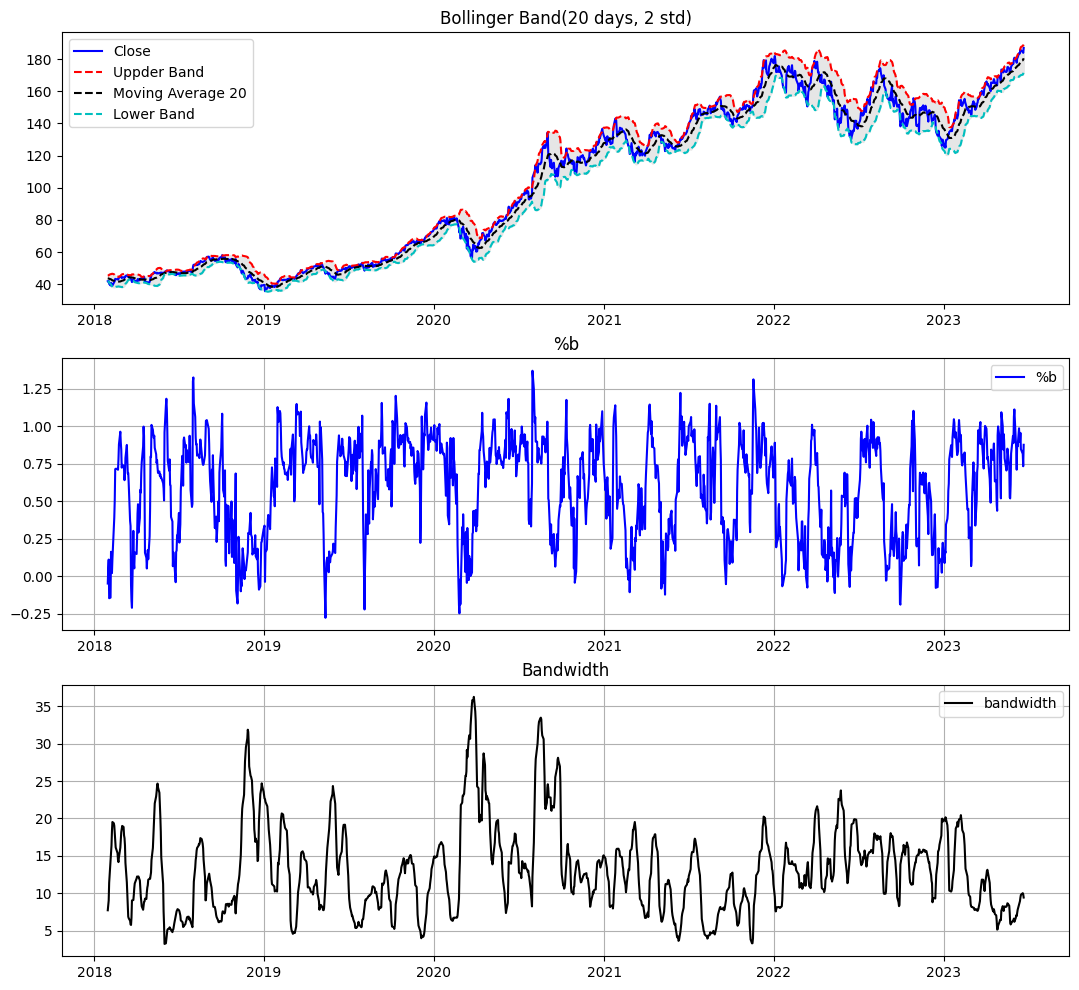

In [ ]:
#볼린저 밴드
#20일 이동평균과 표준편차를 이용해 상단 하단 밴드를 만드는 방법

import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame()

df['Close'] = fdr.DataReader(stock, start, end)['Close']
print(df)
#20일 이동 평균. 그리고 표준편차 * 2를 더하여 위아래 band.
#이 안에서 변동할 확률이 95%
df['ma20'] = df['Close'].rolling(window=20).mean()
df['std'] = df['Close'].rolling(window=20).std()
df['upper'] = df['ma20'] + 2 * df['std']
df['lower'] = df['ma20'] - 2 * df['std']
#상하단이 1~0 일때 현재 가격이 어느정도인가를 나타내는 %b 지표
df['pb'] = (df['Close'] - df['lower']) /  (df['upper'] - df['lower'])
#밴드폭 - 볼린저에 따르면, 밴드폭이 6개월 저점일 때, squeeze(큰 변동이 예상되는 상황) 발생
df['bandwidth'] = (df['upper'] - df['lower']) / df['ma20'] * 100


#첫 20 row는 자료가 없다
df = df[19:]

#display
plt.figure(figsize=(13,12))
#bolinger band
plt.subplot(3,1,1) #볼린저 차트는 3행 1열 그리드에서 1에 배치
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label='Uppder Band')
plt.plot(df.index, df['ma20'], 'k--', label='Moving Average 20')
plt.plot(df.index, df['lower'], 'c--', label='Lower Band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.legend(loc='best') #범례
plt.title('Bollinger Band(20 days, 2 std)')
#%b
plt.subplot(3,1,2)
plt.plot(df.index, df['pb'], color='blue', label='%b')
plt.grid(True)
plt.legend(loc='best')
plt.title('%b')
#bandwidth
plt.subplot(3,1,3)
plt.plot(df.index, df['bandwidth'], color='black', label='bandwidth')
plt.grid(True)
plt.legend(loc='best')
plt.title('Bandwidth')
plt.show()

# Trend Following Method

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02   42.540001   43.075001   42.314999   43.064999   40.831589   
2018-01-03   43.132500   43.637501   42.990002   43.057499   40.824482   
2018-01-04   43.134998   43.367500   43.020000   43.257500   41.014099   
2018-01-05   43.360001   43.842499   43.262501   43.750000   41.481060   
2018-01-08   43.587502   43.902500   43.482498   43.587502   41.326992   
...                ...         ...         ...         ...         ...   
2023-06-15  183.960007  186.520004  183.779999  186.009995  186.009995   
2023-06-16  186.729996  186.990005  184.270004  184.919998  184.919998   
2023-06-20  184.410004  186.100006  184.410004  185.009995  185.009995   
2023-06-21  184.899994  185.410004  182.589996  183.960007  183.960007   
2023-06-22  183.740005  187.050003  183.669998  187.000000  187.000000   

               Volume  
Date         

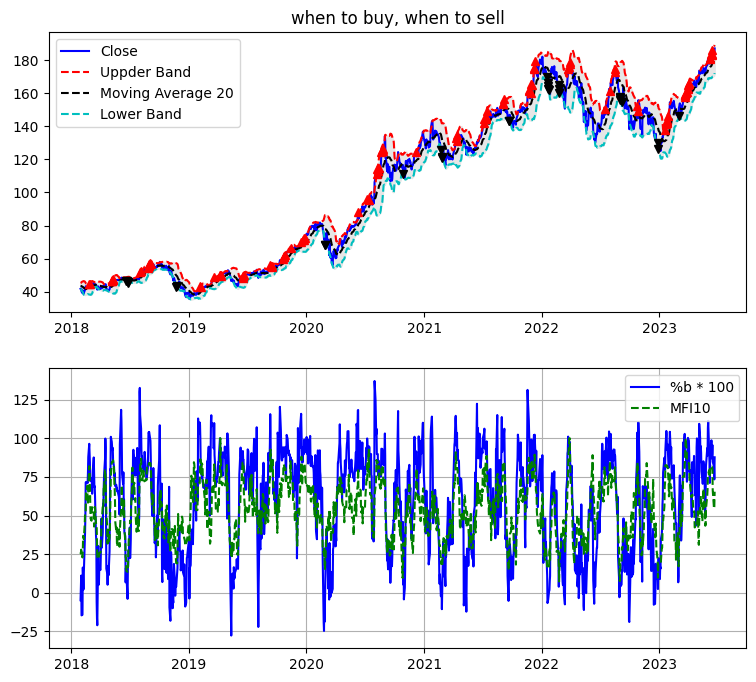

In [ ]:
#볼린저 밴드를 활용한 매매
'''
볼린저는 1.변동성 돌파 2.추세추종 3.반전의 세 가지 기법을 제시했다.
변동성 돌파는 공매도가 필요한데, 개인이 하기 어려우니 2, 3 만 다루었다.
'''

#추세추종
'''
단순히 %b 지표가 0이하일 때 사고, 1 이상일 때 파는 것이 아니다.
또 다른 지표인 MFI 현금흐름 지표를 이용한다.

%b가 0.8보다 크고 MFI가 80보다 클 때 -> 매수
%b가 0.2보다 작고 MFI가 20보다 작을 때 -> 매도

apple 주식의 경우 반대로 하는게 더 이익일 듯 싶다.ㅋㅋ
%b는 현재 가격이 변동성 위아래 폭에 어느정도에 위치하느냐
MFI 는 현금흐름으로, 클수록 긍정적 현금흐름이 많다.

'''


import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame()
df = fdr.DataReader(stock, start, end)  #종가 말고 다른 지표도 필요하다
print(df)

df['ma20'] = df['Close'].rolling(window=20).mean()
df['std'] = df['Close'].rolling(window=20).std()
df['upper'] = df['ma20'] + 2 * df['std']
df['lower'] = df['ma20'] - 2 * df['std']
df['pb'] = (df['Close'] - df['lower']) /  (df['upper'] - df['lower'])
df['bandwidth'] = (df['upper'] - df['lower']) / df['ma20'] * 100

#추가된 코드
df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3  #중심가격 typical price
df['PMF'] = 0 #positive money flow
df['NMF'] = 0 #negative money flow
for i in range(len(df.Close) - 1 ):
  #price increase -> positive money flow = Price * Volume
  if df.TP.values[i] < df.TP.values[i+1]:
    df.PMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
  ##price decrease -> negative money flow = Price * Volume
  else:
    df.NMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]

#Money Flow Index
df['MFI10'] = 100 - 100 / (1 + df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum() )
df = df[19:]


plt.figure(figsize=(9,8))

plt.subplot(2,1,1)
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label='Uppder Band')
plt.plot(df.index, df['ma20'], 'k--', label='Moving Average 20')
plt.plot(df.index, df['lower'], 'c--', label='Lower Band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.Close)):
  #매수조건
  if df.pb.values[i] > 0.8 and df.MFI10.values[i]>80:
    plt.plot(df.index.values[i],df.Close.values[i], 'r^')
    cost_trend.append( (df.index.values[i], df.Close.values[i]) )
    TC_trend += df.Close.values[i]
  #매도조건
  elif df.pb.values[i] < 0.2 and df.MFI10.values[i]<20:
    plt.plot(df.index.values[i],df.Close.values[i], 'kv')
    if( len(cost_trend) ):
      revenue_trend.append( (df.index.values[i], df.Close.values[i]) )
      cost_trend.pop()
      TR_trend += df.Close.values[i]

plt.legend(loc='best') #범례
plt.title('when to buy, when to sell')


plt.subplot(2,1,2)
plt.plot(df.index, df['pb'] * 100, 'b', label='%b * 100')
plt.plot(df.index, df['MFI10'], 'g--', label='MFI10')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#Reversals Method

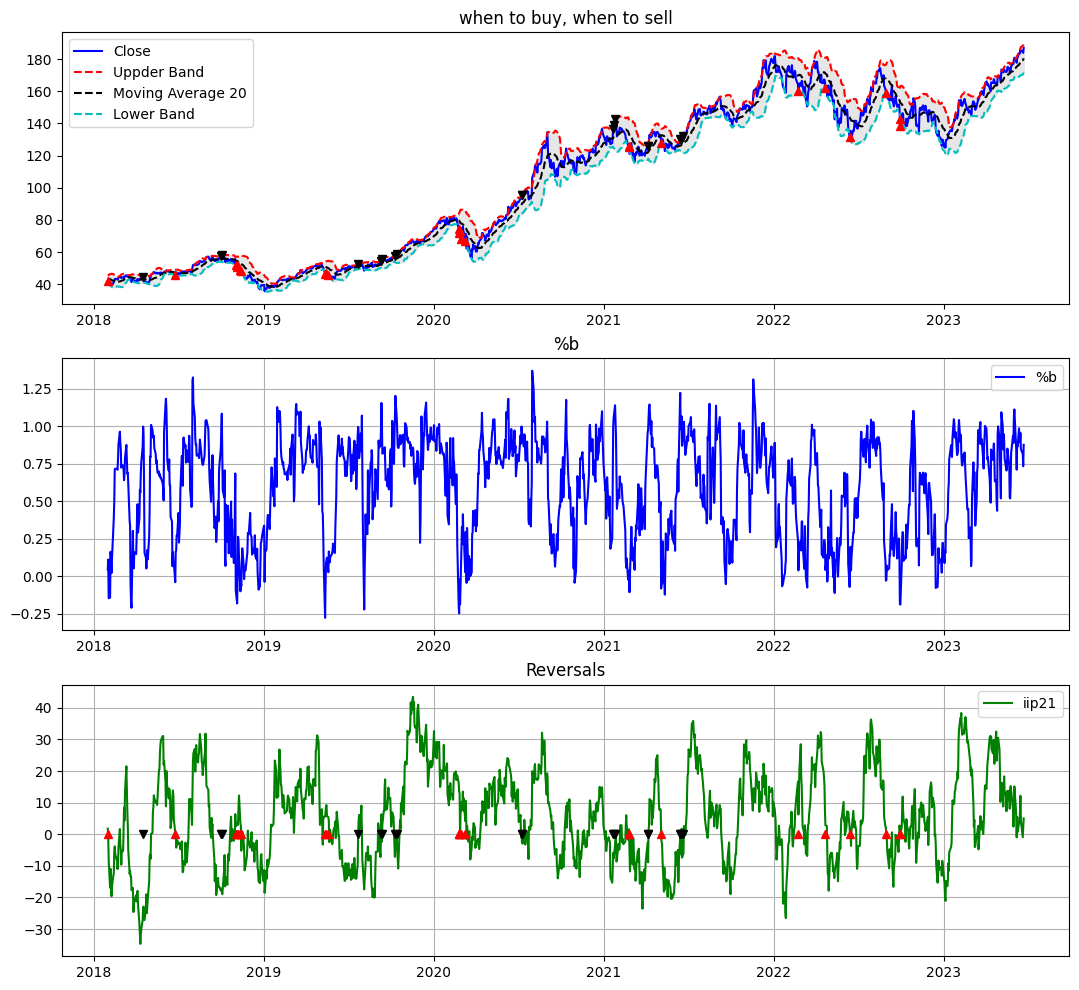

In [ ]:
#반전매매
'''
반전하는 지점을 찾아내 매수 매도
볼린저가 제시한 일중 강도율과 매집분산율 중 일중 강도율(intraday intensity%)을 다룬다.

매수 - %b가 0.05보다 작고, ll%가 0보다 클 때 (볼린저 밴드 하단에 있는데, 강세지표가 발생한 경우)
매도 - %b가 0.95보다 크고, ll%가 0보다 작을 때 (볼린저 밴드 상단에 있는데, 약세지표가 발생한 경우)
'''
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame()


df = fdr.DataReader(stock, start, end)


df['ma20'] = df['Close'].rolling(window=20).mean()
df['std'] = df['Close'].rolling(window=20).std()
df['upper'] = df['ma20'] + 2 * df['std']
df['lower'] = df['ma20'] - 2 * df['std']
df['pb'] = (df['Close'] - df['lower']) /  (df['upper'] - df['lower'])
#추가된 코드
df['ii'] = (2*df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
df['iip21'] = df['ii'].rolling(window=21).sum() / df['Volume'].rolling(window=21).sum() * 100

df= df.dropna()

#display
plt.figure(figsize=(13,12))
#bolinger band
plt.subplot(3,1,1)
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label='Uppder Band')
plt.plot(df.index, df['ma20'], 'k--', label='Moving Average 20')
plt.plot(df.index, df['lower'], 'c--', label='Lower Band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.Close)):
  #매수조건
  if df.pb.values[i] < 0.05 and df.iip21.values[i]>0:
    plt.plot(df.index.values[i],df.Close.values[i], 'r^')
  #매도조건
  elif df.pb.values[i] > 0.95 and df.iip21.values[i] < 0:
    plt.plot(df.index.values[i],df.Close.values[i], 'kv')

plt.legend(loc='best') #범례
plt.title('when to buy, when to sell')

#%b
plt.subplot(3,1,2)
plt.plot(df.index, df['pb'], color='blue', label='%b')
plt.grid(True)
plt.legend(loc='best')
plt.title('%b')
#Reversals
plt.subplot(3,1,3)
plt.plot(df.index, df['iip21'], color='g', label='iip21')
for i in range(len(df.Close)):
  #매수조건
  if df.pb.values[i] < 0.05 and df.iip21.values[i]>0:
    plt.plot(df.index.values[i],0, 'r^')
    cost_reversals.append( (df.index.values[i], df.Close.values[i]) )
    TC_reversals += df.Close.values[i]
  #매도조건
  elif df.pb.values[i] > 0.95 and df.iip21.values[i] < 0:
    plt.plot(df.index.values[i],0, 'kv')
    #없는 걸 팔 수 없다
    if( len(cost_reversals) ):
      revenue_reversals.append( (df.index.values[i], df.Close.values[i]) )
      TR_reversals += df.Close.values[i]
      cost_reversals.pop()
plt.grid(True)
plt.legend(loc='best')
plt.title('Reversals')
plt.show()

#3 Screen Method

In [ ]:
pip install mplfinance

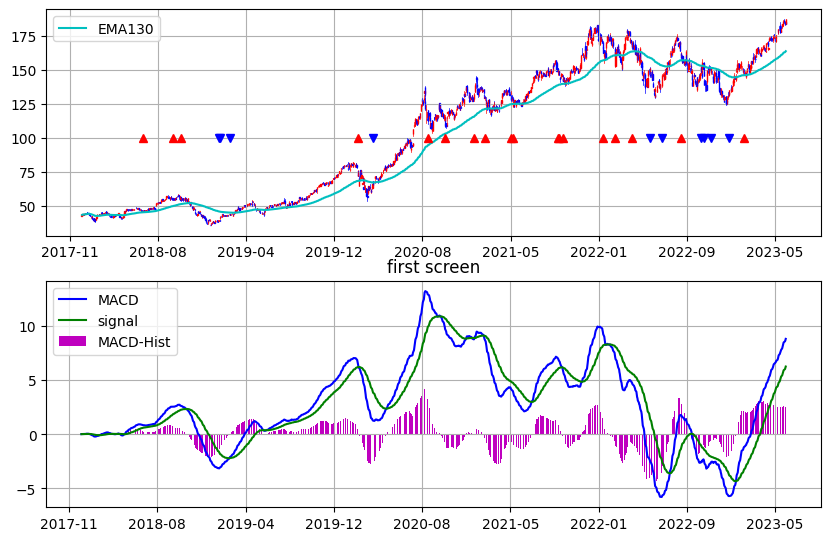

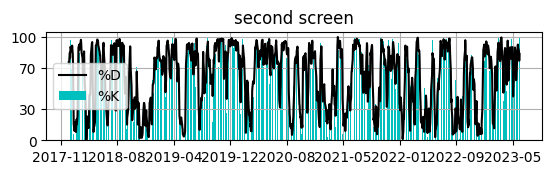

In [ ]:
#삼중창매매 시스템
'''
시장이 상승 추세일 때, 추세추종 지표는 매수, 오실레이터는 매도 신호를 준다.
알렉산더 엘더가 개발한 삼중창 시스템은 한 종류의 지표만을 쓰지 않고 적절히 결합해 사용한다.
'''
#fisrt screen = 시장 조류
'''
자신이 매매하는 시간 단위보다 더 긴 장기 차트를 분석해 상승/하락 추세를 판단한다.
상승 추세라면 매도는 제외, 하락 추세라면 매수는 제외한다.
장기선을 단기선이 뚫고 올라가면 - 상승 추세
https://www.nanumtrading.com/fx-%EB%B0%B0%EC%9A%B0%EA%B8%B0/%EC%B0%A8%ED%8A%B8-%EB%B3%B4%EC%A1%B0%EC%A7%80%ED%91%9C-%EC%9D%B4%ED%95%B4/02-macd-2/

결론:
예전 - MACD가 signal을 뚫고 올라가면 상승추세 반대로 뚫고 내려가면 하락추세
요즘 - ema130이 상승중이면 상승추세, 하락중이면 하락추세
'''

#second screen - 시장 파도
'''
130 지수 이동 평균이 상승중일때, 스토캐스틱이 30 아래로 내려가면(최근 가격들에 비해 낮다) 매수 기회로 파악
130 지수 이동 평균이 하락중일때, 스토캐스틱이 70 위로 올라가면 매도 기회로 파악
'''
#third screen - 진입 기술
'''
첫 번째 창과 두 번째 창이 동시에 매매 신호를 보냈을 때 진입 시점을 찾아내는 기법
주간 추세 상승, 일간 오실레이터 상승 -> 관망
주간 추세 상승, 일간 오실레이터 하랑 -> 추적 매수 스톱
주간 추세 하락, 일간 오실레이터 하락 -> 관망
주간 추세 하락, 일간 오실레이터 매도 -> 추적 매도 스톱
'''
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from mplfinance.original_flavor import candlestick_ohlc #캔들차트 그리기
import matplotlib.dates as mdates
import FinanceDataReader as fdr

df = pd.DataFrame()


df = fdr.DataReader(stock, start, end)

#first screen
#지수 이동 평균 (운영 체제 러닝 타임 예측, 네트워크 RTT 예측)
ema60 = df.Close.ewm(span=60).mean()
ema130 = df.Close.ewm(span=130).mean()
macd = ema60 - ema130 #단기 평균 장기 평균 차이
signal = macd.ewm(span=45).mean()
macdhist = macd - signal #macd 히스토그램
#캔들 차트
df= df.assign(ema130=ema130,ema60=ema60,macd=macd,signal=signal,macdhist=macdhist).dropna()
df['number'] = df.index.map(mdates.date2num)
ohlc=df[['number','Open','High','Low','Close']]

#second screen
ndays_high = df.High.rolling(window=14, min_periods=1).max()#1~14일 최고가
ndays_low = df.Low.rolling(window=14, min_periods = 1).min()#1~14일 최저가
fast_k = (df.Close - ndays_low ) / (ndays_high - ndays_low ) * 100  #지금 종가가 과거 데이터로 비추어 보아 어느정도 수준인지
slow_d = fast_k.rolling(window=3).mean() #k 지수를 smoothing하여 더 느리지만 확실한 신호
df = df.assign(fast_k = fast_k, slow_d = slow_d).dropna()

#third screen


#display
plt.figure(figsize=(10,10))
p1 = plt.subplot(3,1,1)
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup='red', colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.plot(df.number, df['ema130'], color='c', label='EMA130')
for i in range(1, len(df.Close)):
  #buy
  if df.ema130.values[i-1] < df.ema130.values[i] and df.slow_d.values[i-1] >= 20 and df.slow_d.values[i] < 20:
    plt.plot(df.number.values[i], 100, 'r^')
    cost_3screen.append( (df.index.values[i], df.Close.values[i]) )
    TC_3screen += df.Close.values[i]
  #sell
  elif df.ema130.values[i-1] > df.ema130.values[i] and df.slow_d.values[i-1] <= 80 and df.slow_d.values[i] > 80:
    plt.plot(df.number.values[i], 100, 'bv')
    #없는 걸 팔 수 없다
    if( len(cost_3screen) ):
      revenue_3screen.append( (df.index.values[i], df.Close.values[i]) )
      TR_3screen += df.Close.values[i]
      cost_3screen.pop()
plt.legend(loc='best') #범례

#first screen
p2 = plt.subplot(3,1,2)
plt.grid(True)
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('first screen')
plt.bar(df.number,df['macdhist'], color='m', label='MACD-Hist')
plt.plot(df.number,df['macd'], color='b', label='MACD')
plt.plot(df.number,df['signal'], color='g', label='signal')
plt.legend(loc='best')
plt.show()

#second screen
p3 = plt.subplot(3,1,3)
plt.grid(True)
p3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('second screen')
plt.bar(df.number, df['fast_k'], color='c', label='%K')
plt.plot(df.number, df['slow_d'], color='k', label='%D')
plt.yticks([0,30,70,100])
plt.legend(loc='best')
plt.show()

# Momentum investment method

In [ ]:
'''
지난 6~12개월 간 강세주가 이듬해에도 높은 수익률을 낸다는 사실! 승자주 매수, 패자주 매도의 방법.
물론 하락장에서는 모두가 하락하기에 좋지 않다.
따라서 최근 종목들이 채권수익률에 비해 높은 상승장에서만 승자주를 매수 채권 수익률보다 낮은 하락장에서는 매도

S&P 500 종목 기준 이 셀은 2~3분 정도 소요됩니다.
'''

# 거래소별 전체 종목코드: KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#모든 종목 심볼 가져오기
df_nasdaq = fdr.StockListing('SP500')


# 데이터가 없어서 api로 검색 자체가 안되는 것들이 가끔있다. 없애준다!
remove = ['PPD', 'UHALB', 'CREE', 'PBCT', 'ROLL', 'NXT', 'MSPR','SRNG','TLND','ENLT','BRKB','BFB','ZTS']
df_nasdaq = df_nasdaq[~df_nasdaq['Symbol'].isin(remove)]


#지난 6~12개월 승자주 N개 뽑기
paststart = '2022-01-01'
pastend = '2022-12-31'

newstart= '2023-01-01'
newend = '2023-06-01'

n = 20
returns=[]

for symbol in df_nasdaq['Symbol']:
  #첫날, 지금 종가만 가져오기 (6~12개월이 적당)
  close  = fdr.DataReader(symbol, paststart, pastend)['Close']
  tmp = (close[0] / close[-1] - 1) * 100
  returns.append(tmp)

df_nasdaq['ret'] = returns
df_nasdaq = df_nasdaq.sort_values(by='ret', ascending = False)
top_n_stocks = df_nasdaq.head(n)
print('과거 기간의 수익률 대장들')
print(top_n_stocks)
new_returns = []
#이후 6개월 수익률 (채권 수익률보다 높은 상승장인 경우로 참여했다고 가정)
for symbol in top_n_stocks['Symbol']:
  #첫날, 지금 종가만 가져오기 (6~12개월이 적당)
  close  = fdr.DataReader(symbol,newstart , newend)['Close']
  tmp = (close[0] / close[-1] - 1) * 100
  new_returns.append(tmp)
top_n_stocks['new_return'] = new_returns
top_n_stocks = top_n_stocks.sort_values(by='new_return', ascending = False)
print('이후 6개월 결과')
top_n_stocks

과거 기간의 수익률 대장들
    Symbol                    Name                  Sector  \
216   GNRC                 Generac             Industrials   
445   TSLA             Tesla, Inc.  Consumer Discretionary   
306   MTCH             Match Group  Communication Services   
18    ALGN        Align Technology             Health Care   
312   META          Meta Platforms  Communication Services   
93    CTLT                Catalent             Health Care   
368   PYPL                  PayPal              Financials   
481    WBD  Warner Bros. Discovery  Communication Services   
473    VFC          VF Corporation  Consumer Discretionary   
91     CCL                Carnival  Consumer Discretionary   
426    SWK  Stanley Black & Decker             Industrials   
27     AMD                     AMD  Information Technology   
499   ZBRA      Zebra Technologies  Information Technology   
289    LNC       Lincoln Financial              Financials   
85     CZR   Caesars Entertainment  Consumer Discretion

<ipython-input-209-d43e54226d5f>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_n_stocks['new_return'] = new_returns


,Symbol,Name,Sector,Industry,ret,new_return
473,VFC,VF Corporation,Consumer Discretionary,"Apparel, Accessories & Luxury Goods",166.968476,61.091763
289,LNC,Lincoln Financial,Financials,Multi-line Insurance,126.920577,47.323136
93,CTLT,Catalent,Health Care,Pharmaceuticals,176.582989,22.078971
368,PYPL,PayPal,Financials,Transaction & Payment Processing Services,173.715247,20.309727
306,MTCH,Match Group,Communication Services,Interactive Media & Services,223.523715,19.014496
85,CZR,Caesars Entertainment,Consumer Discretionary,Casinos & Gaming,124.687513,3.048037
426,SWK,Stanley Black & Decker,Industrials,Industrial Machinery & Supplies & Components,147.510630,1.627319
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,127.721234,-0.902615
188,EXPE,Expedia Group,Consumer Discretionary,Internet & Direct Marketing Retail,111.152974,-8.389927
216,GNRC,Generac,Industrials,Electrical Components & Equipment,245.628840,-10.291957


# compare

you can compare all Methods(except for Momentum) atfer runnnig all of them!

In [ ]:
print('data used to comapre')
print('''stock='AAPL'
start = '2020'
end = '2023-06-23' ''')
print('-------------------------------------------')
print('1. Trend Following Method')
print('Total Cost:' ,TC_trend)
print('Total Revenue', TR_trend)
print('Profit: ', TR_trend - TC_trend)
print('stock value you are holding: ', len(cost_trend) * df['Close'].tail(n=1) )
print('###########result: ', TR_trend - TC_trend + len(cost_trend) * df['Close'].tail(n=1))
print('-------------------------------------------')

print('2. Reversals Method')
print('Total Cost:' ,TC_reversals)
print('Total Revenue: ', TR_reversals)
print('Profit: ', TR_reversals - TC_reversals)
print('stock value you are holding: ', len(cost_reversals) * df['Close'].tail(n=1) )
print('#############result: ', TR_reversals - TC_reversals + len(cost_reversals) * df['Close'].tail(n=1))
print('-------------------------------------------')


print('3. 3screen Method')
print('Total Cost:' ,TC_3screen)
print('Total Revenue: ', TR_3screen)
print('Profit: ', TR_3screen - TC_3screen)
print('stock value you are holding: ', len(cost_3screen) * df['Close'].tail(n=1) )
print('#############result: ', TR_3screen - TC_3screen + len(cost_3screen) * df['Close'].tail(n=1))
print('-------------------------------------------')

data used to comapre
stock='AAPL'
start = '2020'
end = '2023-06-23' 
-------------------------------------------
1. Trend Following Method
Total Cost: 11782.327517000003
Total Revenue 3512.682505
Profit:  -8269.645012000003
stock value you are holding:  Date
2023-06-22    14212.0
Name: Close, dtype: float64
###########result:  Date
2023-06-22    5942.354988
Name: Close, dtype: float64
-------------------------------------------
2. Reversals Method
Total Cost: 2103.577487
Total Revenue:  1765.0249930000002
Profit:  -338.5524939999998
stock value you are holding:  Date
2023-06-22    1122.0
Name: Close, dtype: float64
#############result:  Date
2023-06-22    783.447506
Name: Close, dtype: float64
-------------------------------------------
3. 3screen Method
Total Cost: 2208.3850110000003
Total Revenue:  1070.980001
Profit:  -1137.4050100000004
stock value you are holding:  Date
2023-06-22    1496.0
Name: Close, dtype: float64
#############result:  Date
2023-06-22    358.59499
Name: Close,

# back test with backtrader

In [ ]:
!pip install backtrader
!pip install finance-datareader
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 8.2 MB/s eta 0:00:00


##RSI

Initial portfolio value: 10,000,000
Final portfolio value: 10,000,643


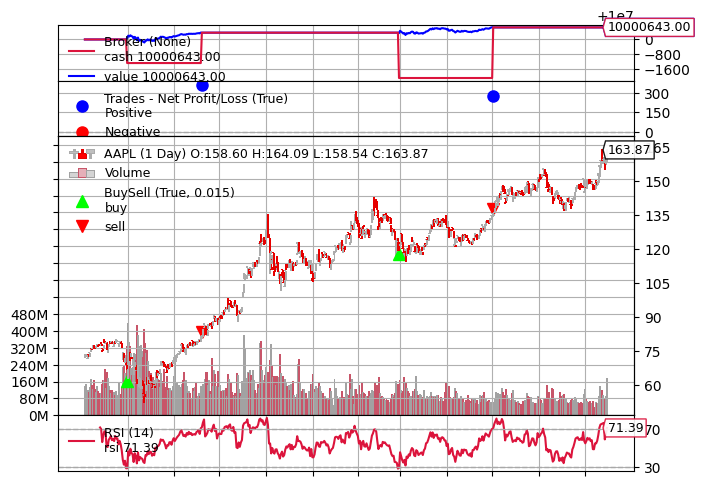

In [ ]:
from datetime import datetime
import backtrader as bt
import pandas as pd
import FinanceDataReader as fdr
'''
https://www.nanumtrading.com/fx-%EB%B0%B0%EC%9A%B0%EA%B8%B0/%EC%B0%A8%ED%8A%B8-%EB%B3%B4%EC%A1%B0%EC%A7%80%ED%91%9C-%EC%9D%B4%ED%95%B4/03-rsi/
backtrader, Zipline, pybacktest 등등 많은 백테스트 라이브러리가 있다.
그 중 backtrader를 이용해본다.
방법은 RSI - 상대강도 평가(오실레이터)
bt.indicators 로 지표를 변수에 저장하여 사용하는데,
Bollinger, CCI, Deviation, DMA, EMA, MACD 등등 대부분 지표를 모듈로 제공한다.
'''

#yahoo api가 바뀌어서 backtrader가 읽지 못한다.(아예 바뀐듯)
#이제 filepath로 인식하므로, 직접 가져와서 하자.
df = pd.DataFrame()
df = fdr.DataReader('AAPL')
df.to_csv('AAPL.csv')

#bt.strategy class 상속
class MyStrategy(bt.Strategy):
  def __init__(self):
    self.rsi = bt.indicators.RSI(self.data.close) #rsi 지표로 사용할 변수에 저장
  #next 메서드는 지표를 만족시키는 주기마다 자동 호출된다.
  def next(self):
    if not self.position: #시장에 참여하고 있지 않을 때, RSI 30미만이면 매수
      if self.rsi<30:
        self.order = self.buy()
    else: #시장에 참여중일 때 70 초과면 매도
      if self.rsi > 70:
        self.order = self.sell()

#cerebro = 핵심 클래스로, 결과 출력 기능
#backtrader.com 에 더 자세히 나와있다.
cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)
data = bt.feeds.YahooFinanceData(dataname='/content/AAPL.csv', fromdate=datetime(2020,1,1), todate=datetime(2021,12,1))
cerebro.adddata(data)
cerebro.broker.setcash(10000000) #초기자금
cerebro.addsizer(bt.sizers.SizerFix, stake=20) #매매단위 주

print(f'Initial portfolio value: {cerebro.broker.getvalue():,.0f}')
cerebro.run()
print(f'Final portfolio value: {cerebro.broker.getvalue():,.0f}')

cerebro.plot(style='candlestick')
a = cerebro.plot()
a[0][0]

##RSI_sma

Initial portfolio value: 10,000,000
[2020-03-02] Buy-price 69  quantity: 134,489  commission fee: 13,010  asset: 10,531,670
[2020-05-06] SELL-price 74  quantity: -134,489  commission fee: 13,848  asset: 10,571,617
[2021-02-25] Buy-price 123  quantity: 76,922  commission fee: 13,249  asset: 10,278,373
[2021-04-20] SELL-price 133  quantity: -76,922  commission fee: 14,348  asset: 11,328,622
[2021-10-05] Buy-price 138  quantity: 74,027  commission fee: 14,310  asset: 11,432,756
[2021-11-03] SELL-price 149  quantity: -74,027  commission fee: 15,429  asset: 12,097,637
Final portfolio value: 12,097,637


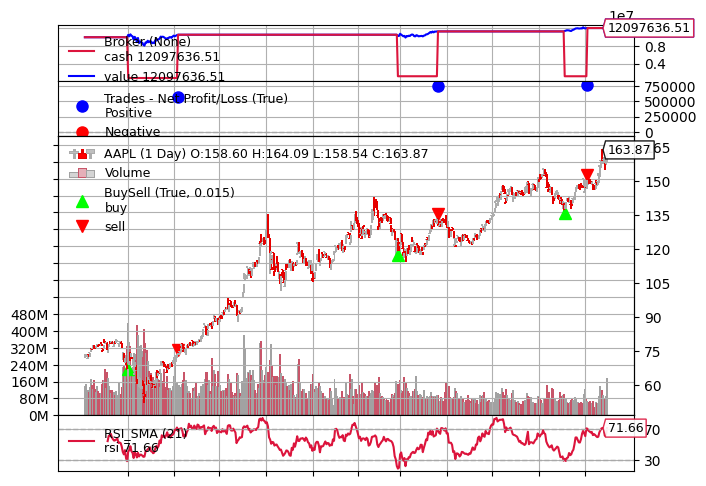

In [ ]:
from datetime import datetime
import backtrader as bt
import pandas as pd
import FinanceDataReader as fdr
'''
RSI_SMA 지표를 이용한 back trading test
21일 단순 이동평균이다.
'''

#yahoo api가 바뀌어서 backtrader가 읽지 못한다.(아예 바뀐듯)
#이제 filepath로 인식하므로, 직접 가져와서 하자.
df = pd.DataFrame()
df = fdr.DataReader('AAPL')
df.to_csv('AAPL.csv')

#bt.strategy class 상속
class MyStrategy(bt.Strategy):
  def __init__(self):
    self.dataclose = self.datas[0].close
    self.order = None
    self.buyprice = None
    self.buycomm = None
    self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21) #rsi 지표로 사용할 변수에 저장

  def notify_order(self, order):
    if order.status in [order.Submitted, order.Accepted]:
      return
    if order.status in [order.Completed]: #기록
      if order.isbuy():
        self.log(f'Buy-price {order.executed.price:,.0f}  '
                 f'quantity: {order.executed.size:,.0f}  '
                 f'commission fee: {order.executed.comm:,.0f}  '
                 f'asset: {cerebro.broker.getvalue():,.0f}'
                 )
        self.buyprice = order.executed.price
        self.buycomm = order.executed.comm
      else:
        self.log(f'SELL-price {order.executed.price:,.0f}  '
                 f'quantity: {order.executed.size:,.0f}  '
                 f'commission fee: {order.executed.comm:,.0f}  '
                 f'asset: {cerebro.broker.getvalue():,.0f}'
                 )
      self.bar_executed = len(self)
    elif order.status in [order.Canceled]:
      self.log('Order canceled')
    elif order.status in [order.Margin]:
      self.log('Order Magin')
    elif order.status in [order.Rejected]:
      self.log('Order Rejected')
    self.order = None

  #next 메서드는 지표를 만족시키는 주기마다 자동 호출된다.
  def next(self):
    if not self.position: #시장에 참여하고 있지 않을 때, RSI 30미만이면 매수
      if self.rsi<30:
        self.order = self.buy()
    else: #시장에 참여중일 때 70 초과면 매도
      if self.rsi>70:
        self.order = self.sell()

  def log(self, txt, dt=None):
    dt = self.datas[0].datetime.date(0)
    print(f'[{dt.isoformat()}] {txt}')

#cerebro = 핵심 클래스로, 결과 출력 기능
#backtrader.com 에 더 자세히 나와있다.
cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)
data = bt.feeds.YahooFinanceData(dataname='/content/AAPL.csv', fromdate=datetime(2020,1,1), todate=datetime(2021,12,1))
cerebro.adddata(data)
cerebro.broker.setcash(10000000) #초기자금
cerebro.broker.setcommission(commission=0.0014) #수수료 - 매수매도마다 2번 차감되므로 0.28%를 2로 나누었다.
cerebro.addsizer(bt.sizers.PercentSizer, percents=90) #매매단위 asset %, 100이면 수수료를 못낸다.

print(f'Initial portfolio value: {cerebro.broker.getvalue():,.0f}')
cerebro.run()
print(f'Final portfolio value: {cerebro.broker.getvalue():,.0f}')

cerebro.plot(style='candlestick')
a = cerebro.plot()
a[0][0]

##volatility breakout

In [ ]:
'''
변동성 돌파 전략
추세가 형성되면 그 방향으로 움직인다는 추세추종 이론에 기반
1.전날 고가 - 저가 로 변동폭 계산
2.오늘 시가 + 전일 변동폭 * K (%) 를 돌파하면 매수한다.
3.장마감 시 무조건 매도
'''




# tensorflow

In [ ]:
!pip install tensorflow

tensor = 다차원 데이터 배열

## 1차 함수 학습

step|    w|    b| cost
----|-----|-----|-----
   1| 0.78| 0.72| 1.62
   3| 0.90| 0.76| 0.55
   5| 0.96| 0.78| 0.19
  10| 1.03| 0.80| 0.02
1000| 1.00| 0.99| 0.00
1100| 1.00| 1.00| 0.00


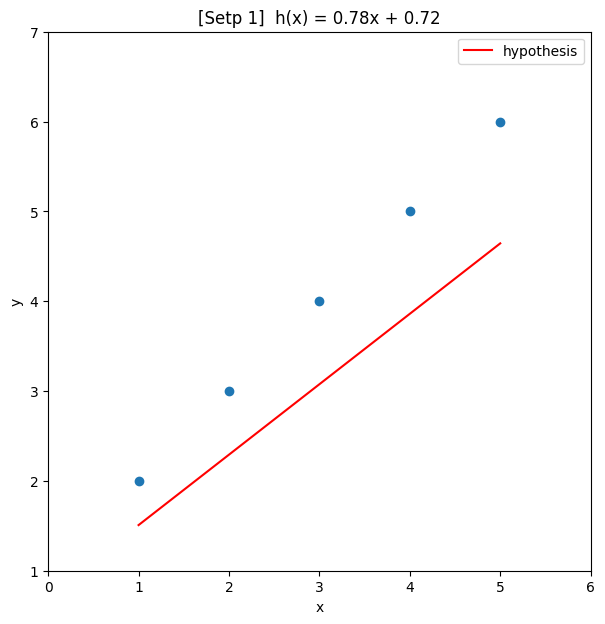

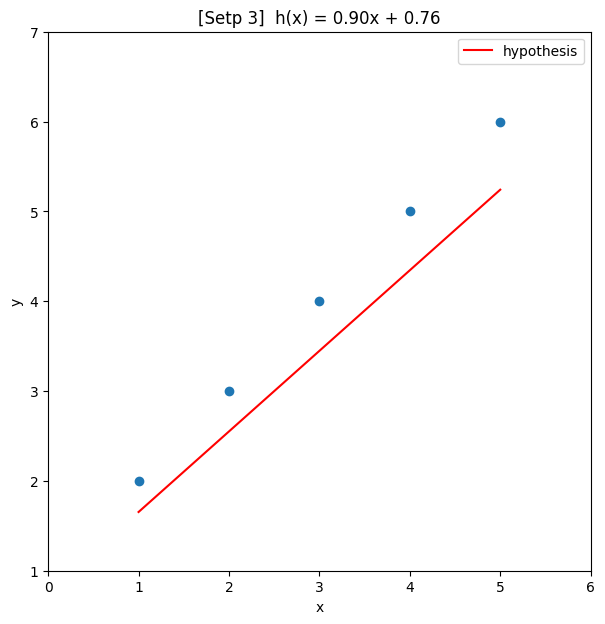

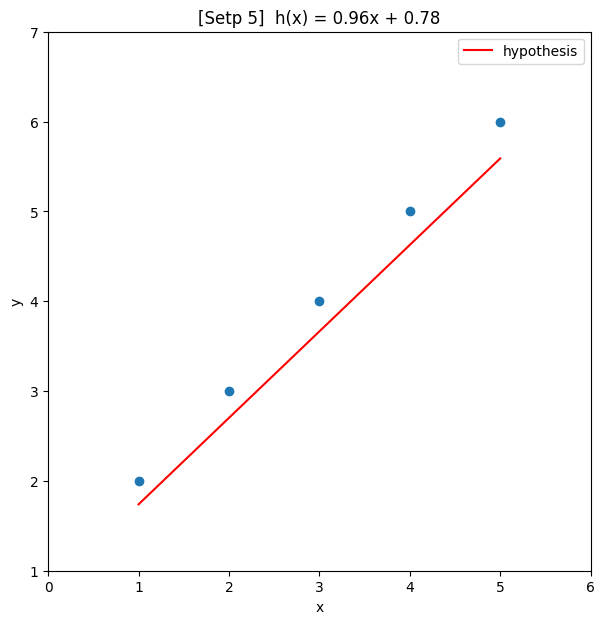

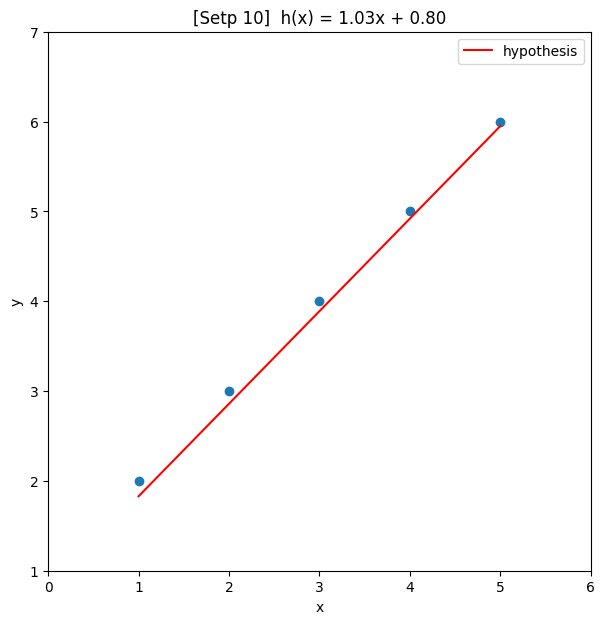

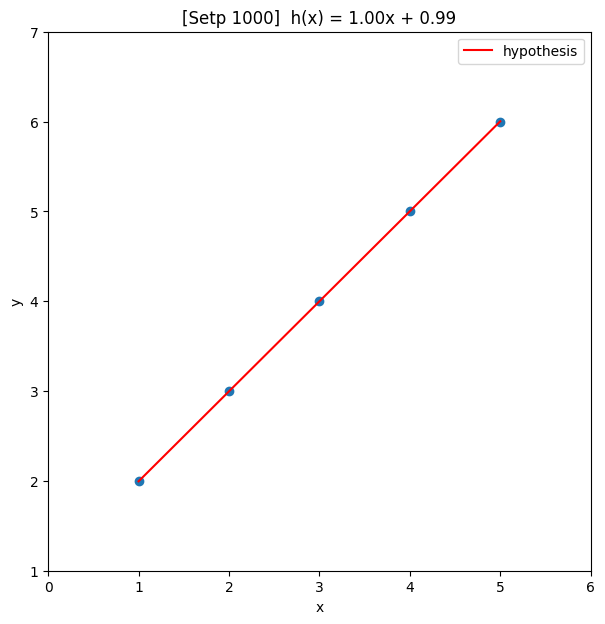

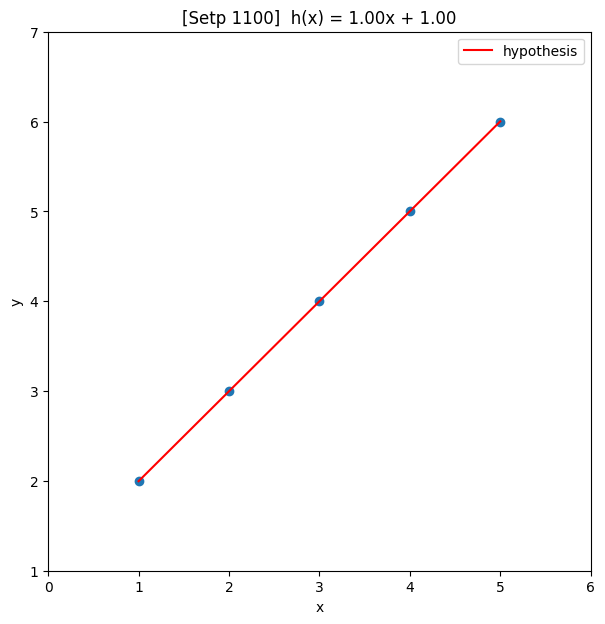

In [1]:
import tensorflow as tf
import matplotlib.pylab as plt

x_data = [1,2,3,4,5]
y_data = [2,3,4,5,6]

w=tf.Variable(0.7) #초기 가중치
b=tf.Variable(0.7) #초기 bias
learn_rate = 0.01 #step size - 보통 0.01~0.001

print(f'step|    w|    b| cost')
print(f'----|-----|-----|-----')

for i in range(1,1101): #1000번 학습
  #계산 과정을 tape에 기록해두어 나중에 tape.gradient()로 미분값을 구할 수 있다.
  with tf.GradientTape() as tape:
    hypothesis = w*x_data + b
    cost = tf.reduce_mean((hypothesis - y_data)**2)
  dw, db = tape.gradient(cost,[w,b]) #미분값 기록

  w.assign_sub(learn_rate * dw)
  b.assign_sub(learn_rate * db)

  if i in [1,3,5,10,1000,1100]:
    print(f'{i:4d}| {w.numpy():.2f}| {b.numpy():.2f}| {cost:.2f}')
    plt.figure(figsize=(7,7))
    plt.title(f'[Setp {i:d}]  h(x) = {w.numpy():.2f}x + {b.numpy():.2f}')
    plt.plot(x_data, y_data, 'o')
    plt.plot(x_data, w* x_data + b, 'r', label='hypothesis')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(0,6)
    plt.ylim(1,7)
    plt.legend(loc='best')

plt.show()

##RNN - price prediction

Recurrent nural network - 순환 신경망
시계열 데이터에 적합
https://wikidocs.net/22886

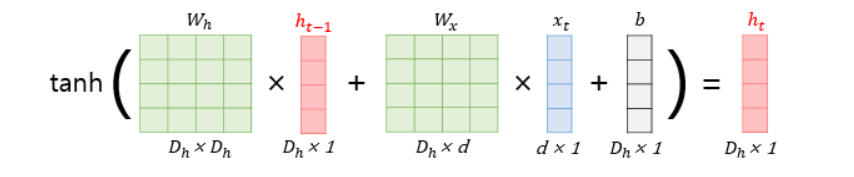

In [15]:
x

[[0.04463464880641483,
  0.04535527202753348,
  0.047451603067211086,
  0.17128874221501342,
  0.05132711993056251],
 [0.048675286957961944,
  0.049194600345992365,
  0.05215152663655813,
  0.2117881773235362,
  0.05127591228149107],
 [0.04869232245355363,
  0.04735171592765953,
  0.05236039727451574,
  0.13938291515690332,
  0.052641456417749234],
 [0.05022676505347789,
  0.050593808571107776,
  0.05404888779306191,
  0.1519089140922854,
  0.05600409204010683],
 [0.05177824314899388,
  0.05100334375054933,
  0.05558068703763659,
  0.12030054628749638,
  0.05489460663226548],
 [0.05211921902733157,
  0.05006483444723126,
  0.05467554148384731,
  0.13068810962855668,
  0.05486045454417813],
 [0.04974938927628958,
  0.04876800831060804,
  0.05396184559541181,
  0.15497448213596182,
  0.05479216402337646],
 [0.052187401927622,
  0.0507985863990374,
  0.05655550255620362,
  0.10087778590140245,
  0.0564820300981069],
 [0.05489820755700163,
  0.05398948799823958,
  0.05857469911583363,
  0.

[[0.04463464880641483, 0.04535527202753348, 0.047451603067211086, 0.17128874221501342, 0.05132711993056251], [0.048675286957961944, 0.049194600345992365, 0.05215152663655813, 0.2117881773235362, 0.05127591228149107], [0.04869232245355363, 0.04735171592765953, 0.05236039727451574, 0.13938291515690332, 0.052641456417749234], [0.05022676505347789, 0.050593808571107776, 0.05404888779306191, 0.1519089140922854, 0.05600409204010683], [0.05177824314899388, 0.05100334375054933, 0.05558068703763659, 0.12030054628749638, 0.05489460663226548], [0.05211921902733157, 0.05006483444723126, 0.05467554148384731, 0.13068810962855668, 0.05486045454417813], [0.04974938927628958, 0.04876800831060804, 0.05396184559541181, 0.15497448213596182, 0.05479216402337646], [0.052187401927622, 0.0507985863990374, 0.05655550255620362, 0.10087778590140245, 0.0564820300981069], [0.05489820755700163, 0.05398948799823958, 0.05857469911583363, 0.16988015509791235, 0.05957155143106366], [0.057830658759729814, 0.057453415325

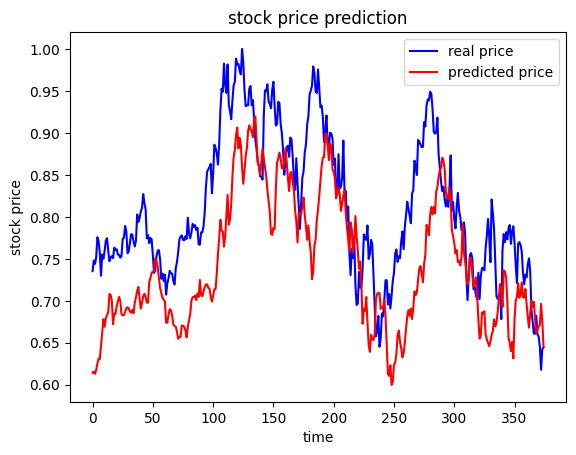

In [37]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

#시간을 줄이기 위해 데이터를 0~1 사이로 간소화
def MinMaxScaler(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / (denominator+1e-7) #0으로 나누지 않도록 작은 값 추가

stock='AAPL'
start = '2018-01-01'
end = '2023-01-01'
df = pd.DataFrame()
df = fdr.DataReader(stock, start, end)

dfx = df[['Open','High','Low','Volume','Close']]
dfx= MinMaxScaler(dfx)
dfy = dfx[['Close']]

x = dfx.values.tolist()
y = dfy.values.tolist()
print(x)
print(y)

data_x = []
data_y = []
window_size = 10
#이전 10일(window_size)의 정보로 다음 날 종가를 예측
for i in range(len(y) - window_size):
  _x = x[i:i+window_size] #day 0~9의 x
  _y = y[i + window_size] #day 10일의 y
  data_x.append(_x)  #3차원-각 day 마다 2차원 정보(open,high,low,close,volume)
  data_y.append(_y)  #2차원-각 day 마다 Close

#0.7 train 0.3 test
train_size = int(len(data_y) * 0.7)
trainX = np.array(data_x[0:train_size])
trainY = np.array(data_y[0:train_size])

test_size = len(data_y) - train_size
testX = np.array(data_x[train_size:])
testY = np.array(data_y[train_size:])

#model
model = Sequential()
model.add(LSTM (units=10, activation = 'relu', return_sequences=True, input_shape=(window_size,5)) )
model.add(Dropout(0.1)) #10%를 무작위로 신호를 꺼버려 과적합 방지
model.add(Dense(units=1)) #유닛이 하나인 출력층
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainX, trainY, epochs=60, batch_size=30)
pred_y = model.predict(testX)

plt.figure()
plt.plot(testY, color='blue', label='real price')
# pred_y는 LSTM 에서 return_sequence=True로 했기 때문에, each time에 대한 것으로 3차원으로 return 된다.
# 즉, 원래 2차원 + time
plt.plot(pred_y[:, 0, 0],color='red', label='predicted price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()